## <center> Gene Mutation


<center> Taha Bouhoun
<center> CS110 Spring 2019

#### 1: Write Python code which, given any two arbitrary strings, outputs the length of the Longest Common Subsequence (LCS) for those two strings.

In [1]:
# importing packages

import pandas as pd
import numpy as np
import seaborn as sns
import random
from math import*
import matplotlib.pyplot as plt
import Levenshtein 

In [ ]:
# The sequences of DNA strings

seq0 = """CAGCGGGTGCGTAATTTGGAGAAGTTATTCTGCAACGAAATCAATC
        CTGTTTCGTTAGCTTACGGACTACGACGAGAGGGTACTTCCCTGATATAGTCAC"""
seq1 = """CAAGTCGGGCGTATTGGAGAATATTTAAATCGGAAGATCATGTTACT
        ATGCGTTAGCTCACGGACTGAAGAGGATTCTCTCTTAATGCAA"""
seq2 = """CATGGGTGCGTCGATTTTGGCAGTAAAGTGGAATCGTCAGATATCAA
        TCCTGTTTCGTAGAAAGGAGCTACCTAGAGAGGATTACTCTCACATAGTA"""
seq3 = """CAAGTCCGCGATAAATTGGAATATTTGTCAATCGGAATAGTCAACTTAGC
        TGGCGTTAGCTTTACGACTGACAGAGAGAAACCTGTCCATCACACA"""
seq4 = """CAGTCCGGCGTAATTGGAGAATATTTTGCAATCGGAAGATCAATCTT
        GTTAGCGTTAGCTTACGACTGACGAGAGGGATACTCTCTCTAATACAA"""
seq5 = """CACGGGCTCCGCATCTATTTTGGGTCAAGTTGCATATCAGTCATCGACAATCAAA
        CACTGTTTTGCGGTAGATAAGATACGACTGAGAGAGGACGTTCGCTCGAATATAGTTAC"""
seq6 = """CACGGGTCCAATTTTGGAGTAAGTTGATATCGTCACGAAATCAATCCT
        GTTTCGGTAGTATAGGACTACGACGAGAGAGGACGTTCCTCTGATATAGTTAC"""
seq7 = """GGTCCGTCAATTTTGGAGTAAGTTGATATCGTCACGAAATCAATCCTG
        TTTCGGTAGTATAGGACTACGACGAGAGAGGACGTTCCTCTGATATAGTTAC"""
seq8 = """CACGGGAATCCGTCAATTTTGGAGTAAGTTGATATCGTCACGAAATCAATC
        CTGTTTCGGTAGTATAGGACTACGACGAGAGAGGACGTTCCTCTGATATAGTTAC"""
seq9 = """CACGGGTCCGTCAATTTTGGAGTAAGTTGATATCGTCACGAAATCAAT
        CCTGTTTCGGTAGTATAGGACTACGACGAGAGAGGACGTTCCTCTGATATAGTTAC"""

# save the sequences as a list of strings
seq = [seq0, seq1, seq2, seq3, seq4, seq5, seq6 ,seq7, seq8, seq9]

In [15]:
'''
Outputting the length of the longest common subseqence
Using dynamic programming
'''

def dyn_lcs(str1, str2): 
    # defining the length of the strings 
    m, n = len(str1), len(str2) 
    
    # creating cache space
    Store = [[None]*(n + 1) for i in range(m + 1)] 
    
    
    for i in range(m + 1): 
        for j in range(n + 1):
            # case where both or one of the strings is Ø
            if i == 0 or j == 0 :
                Store[i][j] = 0
            # if the index characters are the same 
            elif str1[i-1] == str2[j-1]:
                # increment the value of LCS
                Store[i][j] = Store[i-1][j-1] + 1
            else: 
                # takes the max of the diagonal of the LCS matrix
                Store[i][j] = max(Store[i-1][j], Store[i][j-1])
    # returns the last slot of the matrix which is the length of LCS
    return Store[m][n]

print("\nLongest Common Subsequence: ", dyn_lcs(seq[0], seq[9]),'\n')


Longest Common Subsequence:  91 



#### 2: How many LCSs are there in Set_Strings? Generate the table of the lengths of the LCS for every pair of strings in Set_Strings?

The number of Longest Common Subseqences in for the set_strings is 
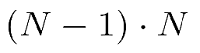

However, we know that:
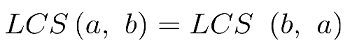

Therefore, the number of possible LCS in the set_strings is
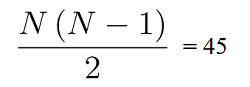


In [16]:
# A function that creates a matrix of the LCS of n strings

def lcs_table(Sequences):
    n = len(Sequences)

    # create a table for storing the values of LCS 
    table = [[None for _ in range(n)] for _ in range(n)]
    
    for i in range(n):
        for j in range(n):

            # avoiding to compute the LCS for the same string
            if i != j:
                # takes advantage of the symmyrty to avoid computing twice
                # because dyn_lcs(i, j) == dyn_lcs(i, j)
                if i > j: 
                    table[i][j] = table[j][i]
            
                # we compute the upper triangle of this matrix
                else: 
                    table[i][j] = dyn_lcs(Sequences[i], Sequences[j])
    
    # table of all LCS between strings
    return table 

Matrix = lcs_table(seq)
pd.options.display.float_format = '{:,.0f}'.format
df = pd.DataFrame.from_records(Matrix)
df.style.highlight_null(null_color='yellow')

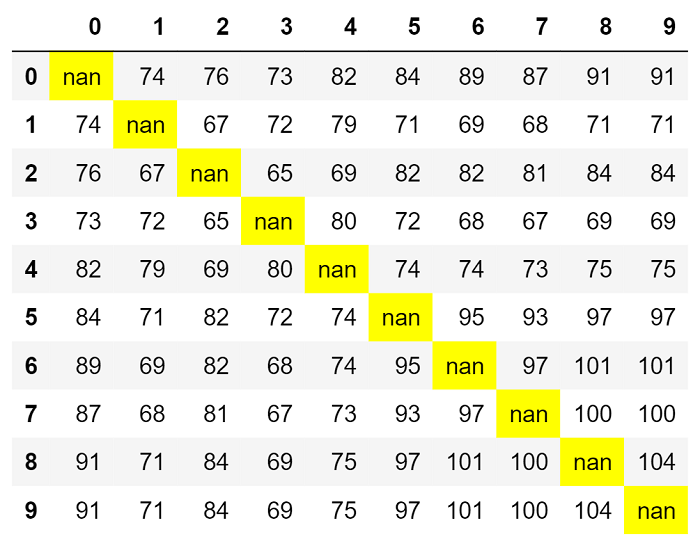

In [17]:
# creating a function that output the upper triangle of a matrix
def upper(matrix, n): 
    # looping through the matrix
    for i in range(0, n): 
        for j in range(0, n): 
            if (i > j): 
                # print none for the lower triangle of a matrix
                matrix [i][j] = None
    return matrix


n = len(Matrix)

# create a matrix to record the ration of LCS over lengths
frac_matrix = [[None for _ in range(n)] for _ in range(n)]
for i in range(n):
    for j in range(n):
        if i != j:
            # add if the slot doesn't belong to the diagonal
            frac_matrix[i][j]=Matrix[i][j]/max(len(seq[i]), len(seq[j]))


pd.options.display.float_format = '{:,.3f}'.format
df_frac = pd.DataFrame.from_records(upper(frac_matrix, 10))
cm = sns.light_palette("lightblue", as_cmap = True)
df_frac.style.background_gradient(cmap = cm)

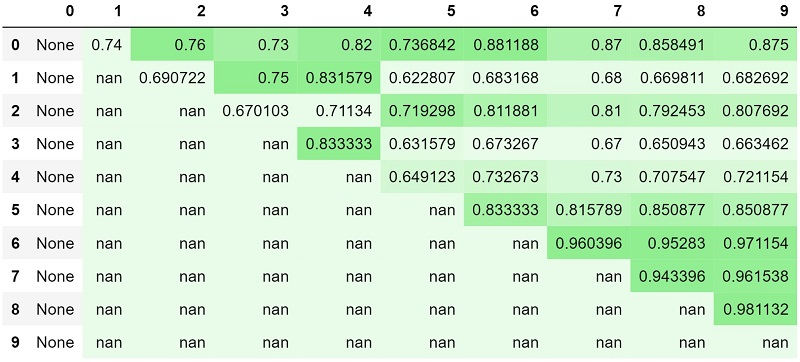

In [18]:
# The change between a string to another

def change(sequ1, sequ2):
    lseq1, lseq2 = len(sequ1), len(sequ2)
    # create a matrix for memoiazation
    store = [[0 for _ in range(lseq2 + 1)] 
                for _ in range(lseq1 + 1)]
    
    # looping through the characters of each sequence
    for i in range(lseq1+1): 
        for j in range(lseq2+1):
            # if the first string is empty
            if i == 0: 
                # increment the second string length
                store[i][j] = j
            # if the second string is empty
            elif j == 0: 
                # increment the first string length
                store[i][j] = i
            # if the index characters for each string are the same
            elif sequ1[i-1] == sequ2[j-1]:
                # initialize the value of the previous iteration
                store[i][j] = store[i-1][j-1] 
  
            else:
                # if the index character is different
                # either it's an insertion
                store[i][j] = 1 + min(store[i][j-1],
                                   # or a removal
                                   store[i-1][j],  
                                   # or a replacement 
                                   store[i-1][j-1]) 
    
    # return the min number of operation needed
    return store[lseq1][lseq2]


n = len(Matrix)
# record the changes needed for two given strings to be identical
change_matrix = [[None for _ in range(n)] for _ in range(n)]
for i in range(n):
    for j in range(n):
        # avoiding the diagonal 
        if i != j:
            # attaching the # of changes for each pair
            change_matrix [i][j] = change(seq[i], seq[j])


change_matrix = pd.DataFrame.from_records(upper(change_matrix, 10))
cm = sns.light_palette("lightgreen", as_cmap = True)
change_matrix.style.background_gradient(cmap = cm)

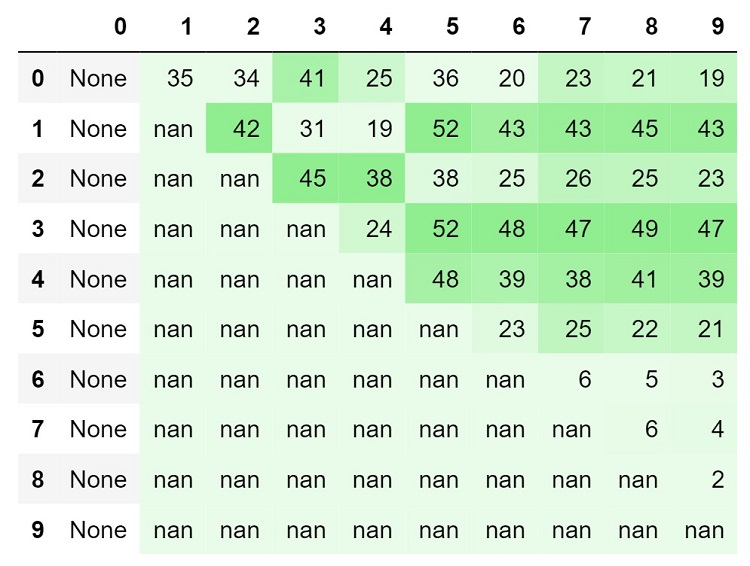

#### 3: Manually examine the table you obtained in 2, and infer the genealogical relationships between strings (i.e., explicitly identify the great-grandparent, grandparent, parent and child strings), and draw the resulting genealogy binary tree associated with Set_Strings. #BSing

According to the table from question 2, we can identify the sequences' order based on how similar their LCS is with other strings. However, we need to normalize the metric that we use for comparing since the length of a given string implies how close its relationship is to the other strings. The ratio of the LCS over the length of the sequence is the caliber by which we compare if two strings have a direct relationship (either a parent or a sibling).

First, we start by stating the expected nodes at each generation:

- number of grand-grandchildren: 3

We can identify these three strings by looking at the nodes that are the least similar to most of the nodes in the tree. In other words, the smaller the ratio of LCS/length of a node, the more likely that it belongs to the last generation as it's distant from the early nodes in the tree.
In the context of set_strings, we can deduce that the nodes 1, 3, and 4 belong to that generation as their ratios to the other strings are relatively small (less than $75$%)

- root node: 1

Taking a look at the column that represents the sequence 9, we distinguish three layers of changes:

[47, 43, 39] corresponding to the nodes [3, 1, 4] 

[23, 21, 19, 4] corresponding to the nodes [2, 5, 0, 7] 

[3, 2] corresponding to the nodes [6, 8]

We notice a clear hierarchy for the different generations which suggests that sequences 9 are most likely the root node not only because it has the strongest similarities between three different nodes but because of the apparent change in magnitude of difference. 

- number of children: 2

Based on the observation for the root sequence 9, we can induce that both sequences 6 and 8 are the most similar to 9 as they're as far as 3 changes away which suggest that they belong to the children generation.

- number of grandchildren: 4

Intuitively, the rest of the nodes are going to belong to this generation. However, we need to distinguish the placement of each of the sequences concerning the phenology binary tree. First, we investigate the sequences that are most likely going to be the leaves of the right side of the tree, basically, any grandchildren sequences that share the least possible similarities with 1, 3, and 4.

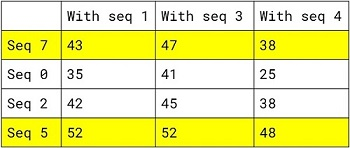

According to the table above, sequences 7 and 5 are the most distanced from the left side leaves which suggests that they belong to the right side of the tree.

The next step is for determining the position of the children 6 and 8, after comparing it against the two pairs of grandchildren [7, 5] and [0, 2] it turns out that 8 has fewer changes between 5 and 7 and on the other hand 6 has fewer changes between 0 and 2 which imply that 8 is the right child of the root and 6 is the left child.

The last piece of the puzzle is determining the position of 0 and 2 concerning grand-grandchildren 1, 3, and 4. Following the table above, we notice that sequence 0 is closer to 4 which suggest a parent-child relationship; hence, 0 is plausible to be the right child of the sequence 6 and, by contrast, the sequence 2 is the left child of 6.

Finally, the most likely structure of the proposed tree would be:

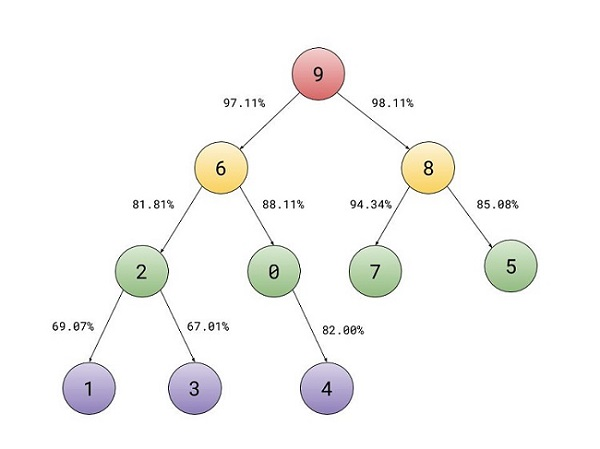

#### 4: Write an algorithm (in pseudocode, or preferably in working Python code) for the general case, which takes as input N sequencing strings and outputs a genealogy binary tree associated with the N strings that best exposes the relationships between them.

We can approach this problem is two ways:
#### Using Dijkstra’s shortest path algorithm:
This algorithm takes the edges of the network as distances then output the shortest path from a given node to all other nodes in the graph. In the context of this problem, we can set the number of changes required for two given strings to be identical (the highest the number of changes, the further away they're from the root).
However, we need to tweak the algorithm is a way that we try all the nodes as the source and evaluate the balance of the vertices to other nodes.
Pseudocode:
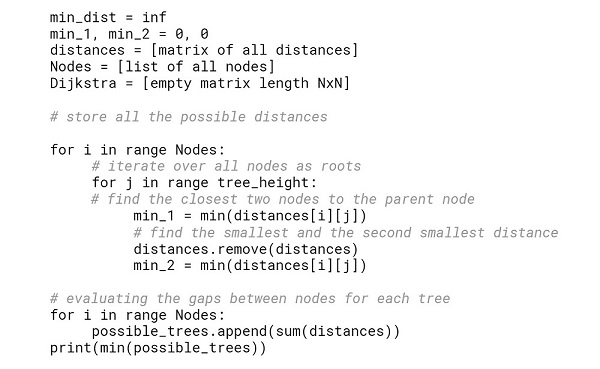


#### Using a weighted binary tree: 
A binary tree can serve as a data structure to output the phenology tree. First, we need to redefine the relations between the parent node and children to have the least changes between them. We know that the tree has 9 edges; hence, after generating the possible combination for the tree, we use the following average:
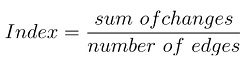
the tree that has the least ratio is the one that is most likely to be the original tree assuming that the probabilities for change (insert, remove, replace) are small.
Pseudocode:
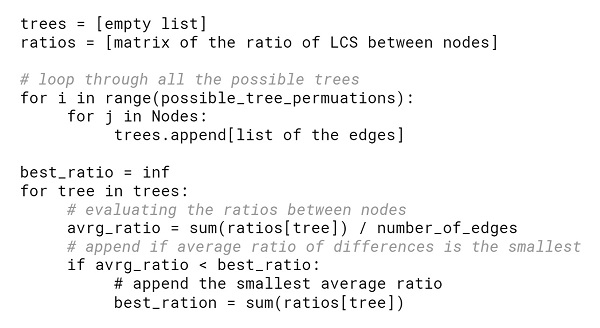

#### 5: Write any strengths or weaknesses of your suggested algorithm.
- Strengths:

The algorithm proposed uses brute force to generate all the possible combination for constructing the tree and measures who likely is the tree to represent the order of the initial sequences. Furthermore, we would wind up with the correct tree on average if we were to follow this strategy in the long run.

Based on both the Longest Common Subsequence and the number of changes needed for a string to match another (either insertion, removal, or replacement), the tree is tested by how similar each intergeneration sequences are to each other.

- Weaknesses:

It's a probabilistic tree as long as we don't know how likely it is for a change to occur. In other words, it's not always the case that having a small LCS implies that the strings are not directly related. Although not likely for these changes to occur, the fact that we ignore how likely is either removing, inserting, or replacement to happen adds another layer of complexity to our problem.

Computational constraints: trying all the combinations for 10 strings takes 
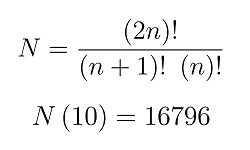
this populated combinations of the possible trees mount to 9 digits after inserting more than 19 sets of strings (e.g., $N(19) = 1.76·10^9$)

#### 6: What is the computational complexity of your solution to produce genealogy binary trees? You can consider M to be the length of a gene, and N the number of genes.

- In the first implementation, the Dijkstra’s algorithm follows a greedy algorithm when it picks a node and selects the two closest distances (the two nodes with the highest LCS) then keep iterating throughout the tree. The depth of the tree is constant (always going to be 4) and we iterate along the 10 strings for each one of them to be the root. The complexity of this approach would be of the order $O(M^2N^2)$


- The second implementation relies on the structure of a modified binary tree, where the tree with the highest ratio score is more likely to be the original one. The complexity depends on the number of nodes and the permutation we can generate. The number of permutation is of the order $O(N!)$ therefore, adding this to the LCS computation would result in complexity of the order $O(M^2N!)$

#### 7: How would you estimate the probabilities of insertions, deletions, and mutations, p_i, p_d and p_c, respectively? (Hint: It is obvious that you don’t have enough data to obtain meaningful estimates for large datasets, but this small dataset has enough information for you to intuitively formulate estimates for p_i, p_d and p_c.)

In [8]:
# Building on the algorithm from part 2

def ops_change(sequ1, sequ2):
    insert, remove, replace = 0, 0, 0
    
    lseq1, lseq2 = len(sequ1), len(sequ2)
    
    store = [[0 for _ in range(lseq2 + 1)] 
                for _ in range(lseq1 + 1)] 
  
    for i in range(lseq1+1): 
        for j in range(lseq2+1): 
  
            if i == 0: 
                store[i][j] = j
  
            elif j == 0: 
                store[i][j] = i
  
            elif sequ1[i-1] == sequ2[j-1]: 
                store[i][j] = store[i-1][j-1] 
  
            else:
                store[i][j] = 1 + min(store[i][j-1],
                                   store[i-1][j],      
                                   store[i-1][j-1]) 
    
    # using the levenshtien package to record the nature of change
    for i in range (len(Levenshtein.editops(sequ1, sequ2))):
        # if the change is an insertion
        if Levenshtein.editops(sequ1, sequ2)[i][0] == 'insert':
            insert +=1
        # if the change is a deletion
        elif Levenshtein.editops(sequ1, sequ2)[i][0] == 'delete':
            remove +=1
        # if the change is a replacement
        else:
            replace +=1
    
    return [store[lseq1][lseq2], insert, remove, replace]


# initialize the total number of changes by category
tot_insert, tot_remove, tot_replace = 0, 0, 0

n = len(Matrix)
# create a matrix to store the operations for each pair
operations = [[None for _ in range(n)] for _ in range(n)]
for i in range(n):
    for j in range(n):
        # avoid the diagonal and the lower triangle of the matrix
        if i != j and i < j:
            # store the output of levenshtien function
            operations [i][j] = ops_change(seq[i], seq[j])
            # increment the number of operations
            tot_insert += operations[i][j][1]
            tot_remove += operations[i][j][2]
            tot_replace += operations[i][j][3]

# total number of changes for all possible trees
tot_operations = tot_insert + tot_remove + tot_replace  

# total number of characters in all the sequences
tot_length = 0
for elem in seq:
    tot_length += (len(elem))

    
# the tree takes only 9 edges out of 45
tot_length = 5 * tot_length

print('\nAverage probabilities for each operation:')
print('Insert :', '{:.2%}'.format(tot_insert/tot_length), 
      '\nRemove :', '{:.2%}'.format(tot_remove/tot_length), 
      '\nReplace:', '{:.2%}'.format(tot_replace/tot_length), '\n')

print('\nThe total number of each operation per tree:')
print('Insert :', int(tot_insert/5), '\nRemove :', 
      int(tot_remove/5), '\nReplace:', int(tot_replace/5),'\n')

print('\nProportion of each operation with respect to total changes:')
print('Insert :', '{:.2%}'.format(tot_insert/tot_operations), 
      '\nRemove :', '{:.2%}'.format(tot_remove/tot_operations), 
      '\nReplace:', '{:.2%}'.format(tot_replace/tot_operations))


Average probabilities for each operation:
Insert : 9.31% 
Remove : 5.38% 
Replace: 12.84% 


The total number of each operation per tree:
Insert : 93 
Remove : 54 
Replace: 128 


Proportion of each operation with respect to total changes:
Insert : 33.82% 
Remove : 19.55% 
Replace: 46.63%


As mentioned in the code above, the way I would estimate the probabilities is by counting the changes needed for two given strings to be identical. Then we populate the possible edges that a tree can have (which is 45, the actual possible LCS values between 10 nodes). As a result, we know that a given tree has only nine edges; hence, we estimate an average of probability for each operation by averaging the total number possible changes.
On average, if we would generate all possible trees, the probability for a change to happen would converge towards the following values:

- p_insert  = 9.31 %
- p_remove  = 5.38 %
- p_replace = 12.84 %

### Appendix

- #induction: to trace back the original tree in part 2, I used deduction to follow the LCS values in the table and match them with the potential phenology tree. The idea is to work backward from the leaves all the way to the most probable string to be the root of the tree.


- #optimization: Aside from using Dynamic Programming rather than recursion when computing the Longest Common Subsequence, I optimized the algorithm to take account for the symmetry of the LCS table between N nodes. Hence, the complexity of computing the LCS would be half the time it initially takes. I also made sure not the calculate the LCS for the diagonal as it would just output the size of the sequence.


- #networks: Using the concepts of networks and graphs to solve for the most probable tree based on the magnitude of change that is required between two given strings that have either parent-child or child-grandchild relation. The graph used to picture the DNA sequence program is an implementation of the concepts of networks to define the similarities between the sequences.


- #plausibility: change is probabilistic. Hence, the trees have a likelihood of being the original one, it's true that operations, like inserting, replacing, and removing, are rare to occur, but we ignore to what extent they can happen. Therefore, I put the most plausible candidate to be the original tree keeping in mind that change might have occurred in different degrees and we might not be able to be deterministic when figuring the order of the strings.

### Refrences
- Michael Gilleland, Merriam Park Software. Levenshtein Distance, in Three Flavors. Retrieved from: https://people.cs.pitt.edu/~kirk/cs1501/Pruhs/Spring2006/assignments/editdistance/Levenshtein%20Distance.htm


- Antti Haapala (2014). Levenshtein package in Python Library. python-Levenshtein 0.12.0. Retrieved from:
https://pypi.org/project/python-Levenshtein/


- Dr. Bino John and Dr. Takis Benos (). Scoring	Matrices for Sequence Comparisons. Carnegie Mellon University. Retrieved from: https://www.cs.cmu.edu/~02710/Lectures/ScoringMatrices2015.pdf	